In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from  sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from  xgboost import XGBClassifier

from sklearn.metrics import (classification_report,accuracy_score,confusion_matrix,
                             precision_score, recall_score, f1_score)

/home/ali/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = datasets.load_digits()

In [3]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

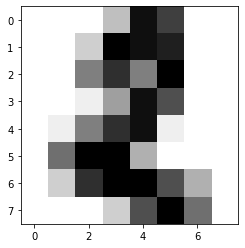

In [4]:
plt.subplot()
plt.imshow(data.images[2], cmap=plt.cm.gray_r)

In [5]:
images_and_labels = list(zip(data.images, data.target))
images_and_labels[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

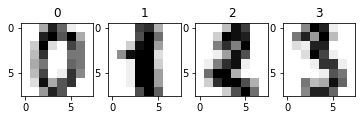

In [6]:
for i,(image,label) in enumerate(images_and_labels[:4]):
    plt.subplot(2,4,i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

In [7]:
np.shape(data.images)

(1797, 8, 8)

In [8]:
y = data.target
X = data.images.reshape((len(data.images),-1))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2022)

In [10]:
svc = SVC()
dtc = DecisionTreeClassifier()
knnc = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=60000,
                             max_depth=16,min_samples_split= 2)
abc = AdaBoostClassifier(learning_rate=.85,n_estimators=3000,)
cbc = CatBoostClassifier(learning_rate=.1,depth=12,verbose=100)
gbc = GradientBoostingClassifier(learning_rate= 0.8, max_depth= 15, max_features= 8, min_samples_split= 8)
xg_reg  =XGBClassifier(max_depth=15,min_child_weight= 1,gamma= 0.5, learning_rate= 0.2,n_jobs=-1)
class_list=[cbc,svc,dtc,knnc,rfc,abc,gbc,xg_reg]
# class_list=[rfc]

In [11]:
%%time

counter=1
for reg in class_list:
    reg.fit(X_train,y_train)
    print(f"Fitting {counter} done")
    counter+=1

0:	learn: 2.1741697	total: 349ms	remaining: 5m 48s
100:	learn: 0.1521548	total: 27.2s	remaining: 4m 1s
200:	learn: 0.0591851	total: 57.7s	remaining: 3m 49s
300:	learn: 0.0346248	total: 1m 31s	remaining: 3m 33s
400:	learn: 0.0243148	total: 2m 6s	remaining: 3m 8s
500:	learn: 0.0185035	total: 2m 38s	remaining: 2m 37s
600:	learn: 0.0148564	total: 3m 10s	remaining: 2m 6s
700:	learn: 0.0124114	total: 3m 47s	remaining: 1m 37s
800:	learn: 0.0106019	total: 4m 22s	remaining: 1m 5s
900:	learn: 0.0092813	total: 4m 54s	remaining: 32.4s
999:	learn: 0.0082570	total: 5m 26s	remaining: 0us
Fitting 1 done
Fitting 2 done
Fitting 3 done
Fitting 4 done
Fitting 5 done
Fitting 6 done
Fitting 7 done
Fitting 8 done
CPU times: user 39min 47s, sys: 58.9 s, total: 40min 45s
Wall time: 9min 33s


In [12]:
%%time
score_dict={}

for reg in class_list:
    
    reg_name = reg.__class__.__name__
    
    pred=reg.predict(X_test)
    
    print("-"*50)
    
    print(reg_name)
  
    print(f"accuracy score : {accuracy_score(y_test,pred)}")
    print(f"classification report : {classification_report(y_test,pred)}")


    score_dict[reg_name]={
        "accuracy score":accuracy_score(y_test,pred),
        "classification report" :classification_report(y_test,pred),

    }

--------------------------------------------------
CatBoostClassifier
accuracy score : 0.9733333333333334
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      0.98      0.96        49
           2       1.00      1.00      1.00        41
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        47
           5       0.98      0.94      0.96        54
           6       0.98      0.98      0.98        45
           7       0.95      1.00      0.98        42
           8       0.93      0.95      0.94        40
           9       0.95      0.93      0.94        41

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

--------------------------------------------------
SVC
accuracy score : 0.98
classification report :           

In [13]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("accuracy score" ,ascending=False)
score_pd

,accuracy score,classification report
SVC,0.98,precision recall f1-score ...
RandomForestClassifier,0.98,precision recall f1-score ...
CatBoostClassifier,0.973333,precision recall f1-score ...
KNeighborsClassifier,0.971111,precision recall f1-score ...
GradientBoostingClassifier,0.948889,precision recall f1-score ...
XGBClassifier,0.94,precision recall f1-score ...
AdaBoostClassifier,0.868889,precision recall f1-score ...
DecisionTreeClassifier,0.844444,precision recall f1-score ...
